## Importing tools and data set

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd #analytics tool
import numpy as np #analytics tool
from sklearn.linear_model import LogisticRegression #since we are trying to predict a yes or no answer, a logistic regression model will be the best fit
from sklearn.model_selection import train_test_split #this will help train the model
from sklearn.metrics import confusion_matrix #this will determine the accuracy of the model
from sklearn.model_selection import GridSearchCV #help provide with the best combination 


In [10]:
df = pd.read_csv('FlightDelays_Data_3.0.csv') #uploading the data

## EDA 

Taking a closer look at the data and get a better understanding of the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
Canceled            5999 non-null float64
Month               6000 non-null int64
DepartureTime       6000 non-null int64
UniqueCarrier       6000 non-null object
SchedElapsedTime    5998 non-null float64
ArrDelay            5999 non-null float64
DepDelay            6000 non-null int64
Distance            5999 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 375.1+ KB


The dataset contains very little null. The null values will be dropped, assuming it won't truly skew the data

In [12]:
df = df.dropna()

In [13]:
df.head() 

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1.0,12,814,UA,134.0,0.0,0,679.0
1,1.0,12,830,DL,90.0,0.0,0,214.0
2,1.0,1,1835,UA,213.0,0.0,0,1605.0
3,1.0,4,1730,AA,80.0,0.0,0,235.0
4,1.0,7,1442,UA,103.0,0.0,0,413.0


In [14]:
airline = pd.get_dummies(df.UniqueCarrier) #There are three unique Carriers, UA, AA, and DL. Dummy variables will be created to help determine if these unique carriers play a role in delays

In [15]:
airline.head() #a preview of the dummy airline set

,AA,DL,UA
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


From here, the dummy variables will now be incorporated into the original data set

In [16]:
df['AA'] = airline['AA'] #incorporates the a boolean to determine if the airline is AA, which gives it a 1
df['DL'] = airline['DL'] #Same thing with Delta as above
df['UA']=airline['UA'] #Same thing as with United above

In [17]:
df.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance,AA,DL,UA
0,1.0,12,814,UA,134.0,0.0,0,679.0,0,0,1
1,1.0,12,830,DL,90.0,0.0,0,214.0,0,1,0
2,1.0,1,1835,UA,213.0,0.0,0,1605.0,0,0,1
3,1.0,4,1730,AA,80.0,0.0,0,235.0,1,0,0
4,1.0,7,1442,UA,103.0,0.0,0,413.0,0,0,1


In [18]:
df1 = df.copy() #creating a new dataset to preserve most of the old dataset

In [19]:
from pandas import scatter_matrix #the scatter matrix will help us determine if there are any sort of linear relationships

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1120d2160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1d1aa5f8>]], dtype=object)

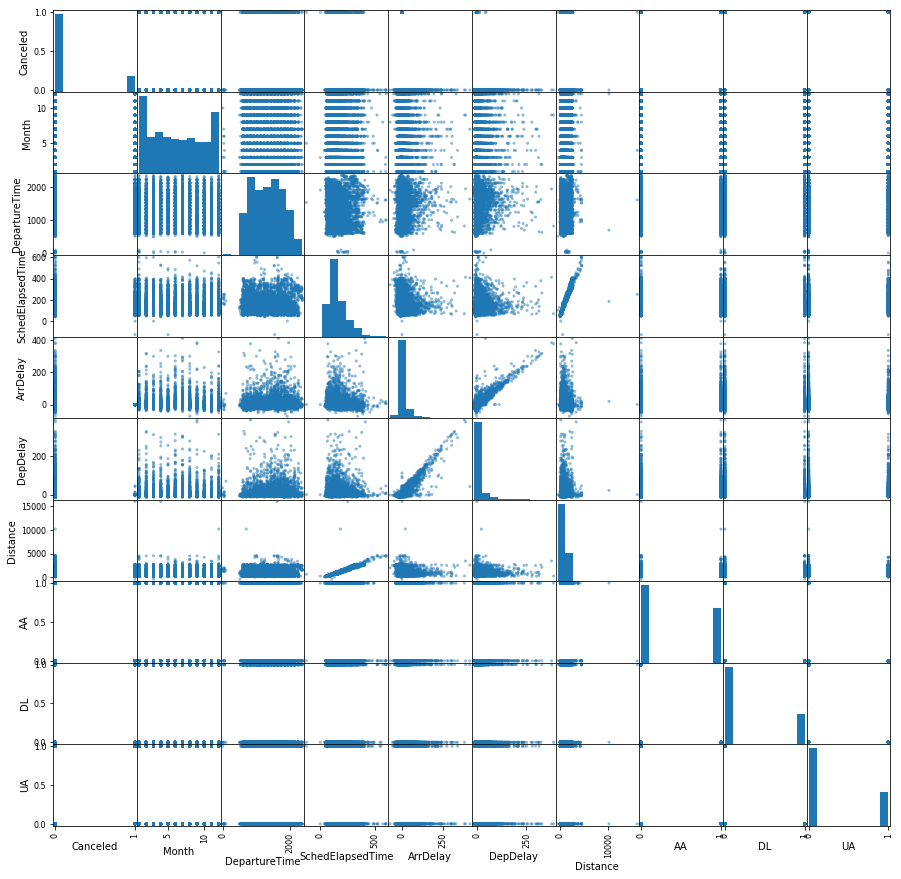

In [20]:
scatter_matrix(df1,figsize = [15,15])

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


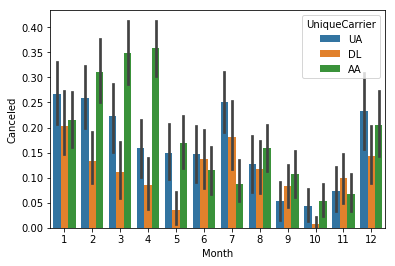

In [21]:
ax = sns.barplot(x='Month', y= 'Canceled', hue = 'UniqueCarrier', data=df)

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


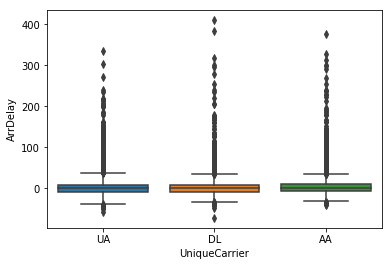

In [22]:
ax = sns.boxplot(x='UniqueCarrier', y= 'ArrDelay', data=df)

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


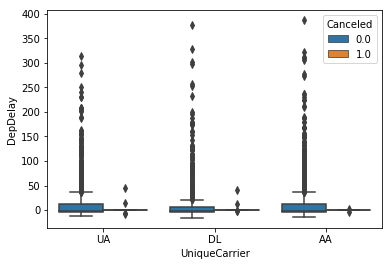

In [23]:
ax = sns.boxplot(x='UniqueCarrier', y= 'DepDelay', hue = 'Canceled', data=df)

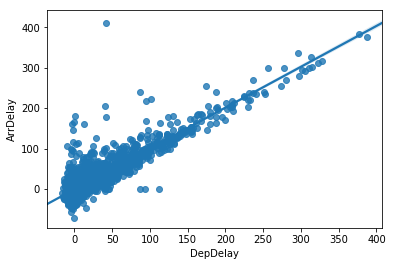

In [24]:
zx = sns.regplot(x='DepDelay',y='ArrDelay',data=df)

In [17]:
df.UA.describe()

count    5995.000000
mean        0.305922
std         0.460835
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: UA, dtype: float64

In [25]:
df6 = df[df['Canceled']==1]

In [26]:
df6.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance,AA,DL,UA
0,1.0,12,814,UA,134.0,0.0,0,679.0,0,0,1
1,1.0,12,830,DL,90.0,0.0,0,214.0,0,1,0
2,1.0,1,1835,UA,213.0,0.0,0,1605.0,0,0,1
3,1.0,4,1730,AA,80.0,0.0,0,235.0,1,0,0
4,1.0,7,1442,UA,103.0,0.0,0,413.0,0,0,1


/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


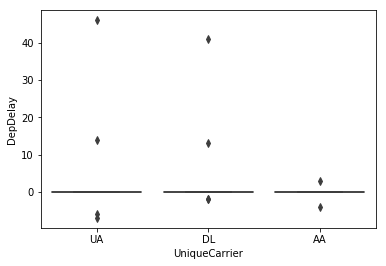

In [27]:
ax = sns.boxplot(x='UniqueCarrier', y= 'DepDelay', data=df6)

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


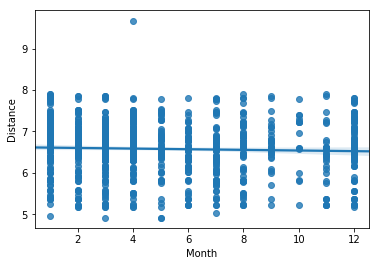

In [28]:
sns.regplot(x=df6.Month,y=np.log(df6.Distance))

In [29]:
df6.UA.sum()

318

In [30]:
df6.AA.sum()

492

In [31]:
df6.DL.sum()

189

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


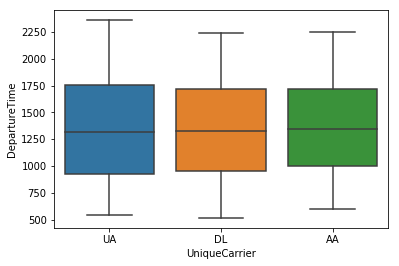

In [32]:
ax = sns.boxplot(x='UniqueCarrier', y= 'DepartureTime', data=df6)

In [33]:
ua = df[df['UniqueCarrier']=="UA"]

In [127]:
dl = df[df['UniqueCarrier']=="DL"]

In [35]:
aa = df[df['UniqueCarrier']=="AA"]

In [36]:
ua.DepDelay.sum()

19712

In [129]:
ua.Canceled.sum() #determining the amount of cancellations for UA

318.0

In [130]:
aa.Canceled.sum() #determining the amount of cancellations for AA

492.0

In [128]:
dl.Canceled.sum() #determining the amount of cancellations for Delta Airline

189.0

In [37]:
aa.DepDelay.sum()

23627

In [38]:
dl.DepDelay.sum()

11505

In [39]:
dl.ArrDelay.sum()

11472.0

In [40]:
aa.ArrDelay.sum()

22931.0

In [41]:
ua.ArrDelay.sum()

14253.0

In [42]:
df1.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance,AA,DL,UA
0,1.0,12,814,UA,134.0,0.0,0,679.0,0,0,1
1,1.0,12,830,DL,90.0,0.0,0,214.0,0,1,0
2,1.0,1,1835,UA,213.0,0.0,0,1605.0,0,0,1
3,1.0,4,1730,AA,80.0,0.0,0,235.0,1,0,0
4,1.0,7,1442,UA,103.0,0.0,0,413.0,0,0,1


In [43]:
df1.Distance.min()

-439.0

In [44]:
len(aa[aa['DepDelay']>0])

800

In [45]:
len(aa[aa['DepDelay']>0])/len(aa)

0.32336297493936944

In [46]:
274/800

0.3425

In [47]:
len

<function len>

In [48]:
551/1687

0.3266152934202727

In [49]:
dl_group = dl.groupby('DepDelay').mean()

In [50]:
dl_group.head()

,Canceled,Month,DepartureTime,SchedElapsedTime,ArrDelay,Distance,AA,DL,UA
DepDelay,,,,,,,,,
-16,0.0,12.000000,1810.000000,107.0,-10.000000,588.0,0,1,0
-15,0.0,8.500000,1973.500000,149.0,-9.000000,872.0,0,1,0
-14,0.0,5.666667,1253.333333,171.0,5.333333,1121.0,0,1,0
-13,0.0,5.500000,1267.500000,165.0,2.000000,1123.5,0,1,0
-12,0.0,6.500000,927.500000,118.0,-12.000000,734.5,0,1,0


## Model Prediction

In [51]:
df2 = df1.copy() #creating another copy as well to start manipulating the overall dataset

In [52]:
df2.groupby('UniqueCarrier').size()

UniqueCarrier
AA    2474
DL    1687
UA    1834
dtype: int64

In [57]:
df2['UA'].sum() #getting an idea of how many flights are United

1834

In [58]:
df2.groupby('UA').size()

UA
0    4161
1    1834
dtype: int64

In [60]:
df2.groupby('Canceled').size() #determining how many of the flights are canceled

Canceled
0.0    4996
1.0     999
dtype: int64

In [61]:
len(df2) #length of the data set

5995

In [62]:
999/5995 #the ratio of canceled flights

0.16663886572143452

In [63]:
df2 = df2.drop(['UniqueCarrier'],axis =1) #removing the unique carrier code since it is a string

In [64]:
X = df2.drop(['Canceled'],axis=1)

In [65]:
y = df2.Canceled #establishing the target variable

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y) #creating my train group and my test group

## The Predictive Model

In [67]:
lr = LogisticRegression(class_weight='balanced') #The model will include a class_weight to help the model from selecting a majority of the flights to be canceled

In [69]:
lr_train = lr.fit(X_train,y_train) #creating the training set

In [70]:
lr_train.score(X_train,y_train)

0.59341637010676151

In [71]:
 lr_train.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [72]:
x_first = lr.predict(X_test)

In [73]:
acc = confusion_matrix(x_first,y_test) 

In [74]:
print(acc) #to help see how the model predicted

[[715  70]
 [555 159]]


In [75]:
188/1499

0.12541694462975317

In [76]:
grid = GridSearchCV #to help produce the most optimal estimator

In [77]:

penalty = ['l1', 'l2'] # Create regularization penalty space


C = np.logspace(0, 4, 10) # Create regularization hyperparameter space


hyperparameters = dict(C=C, penalty=penalty) # Create hyperparameter options

In [78]:
prac_x = lr.predict(X)

In [79]:
prac = confusion_matrix(prac_x,y)

In [80]:
print(prac)

[[2825  282]
 [2171  717]]


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [82]:
clf = GridSearchCV(lr, param_grid=hyperparameters, cv=5,scoring='accuracy')

In [83]:
pred1 = clf.fit(X_train,y_train)

In [84]:
clf.score(X_train,y_train)

0.5920818505338078

In [85]:
clf.fit(X_test,y_test)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e+00,   2.78256e+00,   7.74264e+00,   2.15443e+01,
         5.99484e+01,   1.66810e+02,   4.64159e+02,   1.29155e+03,
         3.59381e+03,   1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
x2 = clf.best_estimator_ #the best estimator function will help select the best Logistic Regression combination

This is my function to use

In [87]:
x2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [88]:
x2.score(X_train,y_train)

0.59230427046263345

In [89]:
test1 = x2.predict(X_test)

In [93]:
con = confusion_matrix(y_test,test1) #testing if the accuracy of my model

In [94]:
print(con) #printing my results to see how it performed

[[663 581]
 [ 69 186]]


## Developing the Function

In [95]:
def model(X):
    return x2.predict(X) #developing a function for my model

The function above allows the user to plug in a row of similar X values and should return the predicted results

In [96]:
zy = model(X)

In [104]:
xyz = confusion_matrix(y,zy)

In [105]:
print(xyz)

[[2778 2218]
 [ 265  734]]


In [107]:
dl.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance,AA,DL,UA
1,1.0,12,830,DL,90.0,0.0,0,214.0,0,1,0
5,1.0,2,820,DL,119.0,0.0,0,692.0,0,1,0
6,1.0,1,1430,DL,70.0,0.0,0,214.0,0,1,0
9,1.0,6,1725,DL,118.0,0.0,0,533.0,0,1,0
12,1.0,9,1319,DL,131.0,0.0,0,732.0,0,1,0


## Testing Delta Airlines w/ the Model

In [113]:
dl_target = dl.Canceled #testing Delta Airlines with my model

AttributeError: 'DataFrame' object has no attribute 'Canceled'

In [108]:
dl =dl.drop(['Canceled'],axis=1)

In [109]:
dlx = dl.drop(['UniqueCarrier'],axis=1)

In [110]:
dly = model(dlx)

In [111]:
dlz = confusion_matrix(dl_target,dly)

In [112]:
print(dlz)

[[1193  305]
 [ 138   51]]


My model is showing that only 9% of the flights are canceled, my model is off by 18% for Delta Airlines

## Testing United Airline w/ the Model

In [114]:
ua_x = ua.drop(['Canceled'],axis=1)
ua_x = ua_x.drop(['UniqueCarrier'],axis=1)
ua_y = ua.Canceled

In [115]:
ua_predict = model(ua_x)

In [116]:
print(confusion_matrix(ua_y,ua_predict))

[[760 756]
 [ 63 255]]


In [136]:
255/1834

0.1390403489640131

In [134]:
ua_y.sum()

318.0

In [135]:
len(ua_x)

1834

## Testing American Airline w/ the Model

In [137]:
aa_x = aa.drop(['Canceled'],axis=1) #dropping the target variable
aa_x = aa_x.drop(['UniqueCarrier'],axis=1) #dropping the string
aa_y = aa.Canceled

In [138]:
aa_predict = model(aa_x)

In [139]:
print(confusion_matrix(aa_y,aa_predict))

[[ 825 1157]
 [  64  428]]


In [140]:
len(aa_x)

2474

In [141]:
aa_y.sum()

492.0

The Model is predicting that 20% of the American Airline flights will be caneled, this is slightly more than what was given in the initial set. The initial set only had 17% of American Flights would be canceled

After using the flight data amongst my model, my model predicts Delta Airlines to have the lowest cancellation rate, at 9%.

In [2]:
import pdfkit 
pdfkit.from_string('Digitas DS Projec - Szewczyk.ipynb','GfG.pdf')

OSError: No wkhtmltopdf executable found: "b''"
If this file exists please check that this process can read it. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf